Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: https://github.com/JohnLuis07/CMSC-197

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# %matplotlib inline

In [7]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [8]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

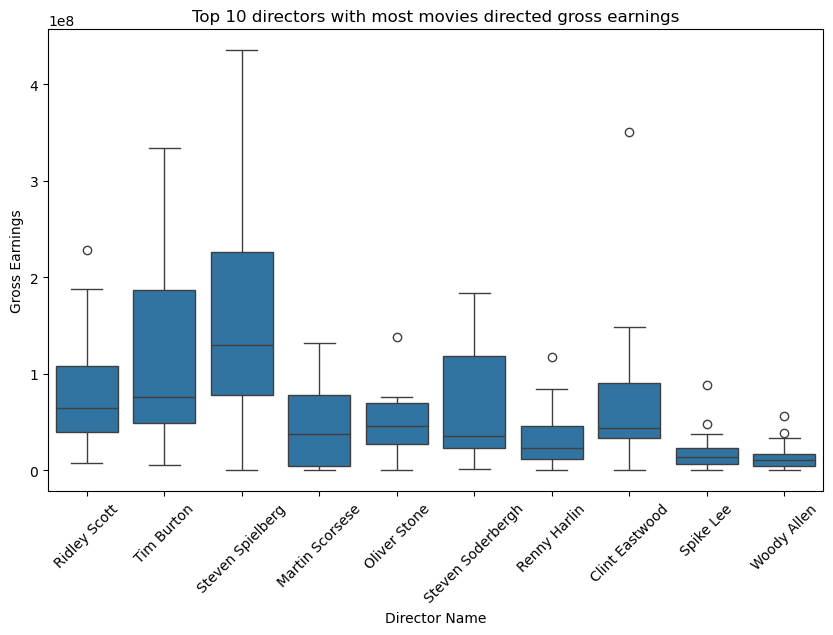

In [10]:
# Removes the 0s in the data
top_directors = data['director_name'].replace('0', pd.NA).dropna()

# Get the top 10 directors that directed the most movies
top10_directors = top_directors.value_counts().nlargest(10).index

# Get the data of the top 10 directors
top_directors_data = data[data['director_name'].isin(top10_directors)]

# Plot the top 10 directors
plt.figure(figsize=(10,6))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.title('Top 10 directors with most movies directed gross earnings')
plt.xticks(rotation=45)
plt.xlabel('Director Name')
plt.ylabel('Gross Earnings')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

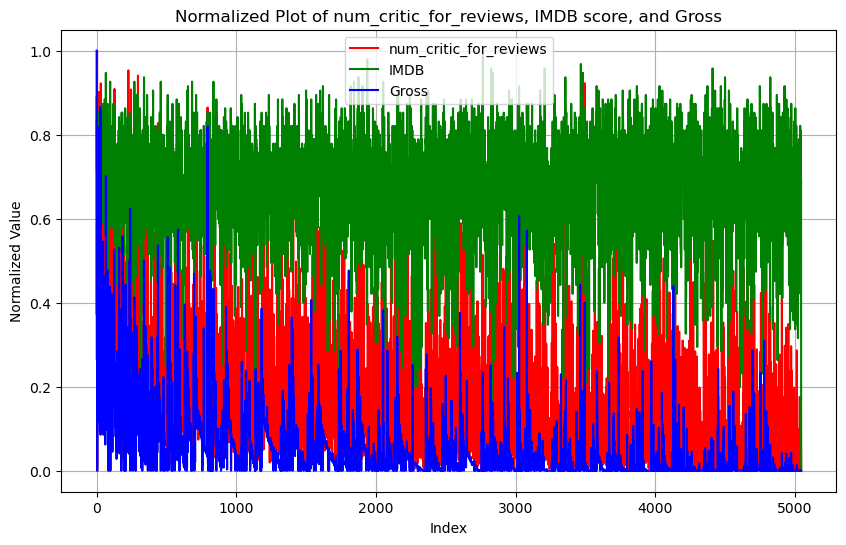

In [12]:
# Specify the columns to normalize
columns = ['num_critic_for_reviews', 'imdb_score', 'gross']

# Extract the specified columns
dataframe = pd.DataFrame(data[columns])

# Normalize the data for each column
normalized_data = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.plot(normalized_data.index, normalized_data['num_critic_for_reviews'], label='num_critic_for_reviews', color='red')
plt.plot(normalized_data.index, normalized_data['imdb_score'], label='IMDB', color='green')
plt.plot(normalized_data.index, normalized_data['gross'], label='Gross', color='blue')

plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.title('Normalized Plot of num_critic_for_reviews, IMDB score, and Gross')

plt.legend()
plt.grid(True)
plt.show()


## Compute Sales (Gross - Budget), add it as another column

In [18]:
# Subtract budget from gross
data['sales'] = data['gross'] - data['budget']

# Display the data
print(data['sales'])

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64


## Which directors garnered the most total sales?

In [20]:
# Calculates the sum of the total sales for each direcor.
total_sales = data.groupby('director_name')['sales'].sum().reset_index()

# Sort in descending order
total_sales = total_sales.sort_values(by='sales', ascending=False)

# Top 5 directors garnered the most total sales
top_directors_sales = total_sales.head(5)

# Display the result
top_directors_sales

,director_name,sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

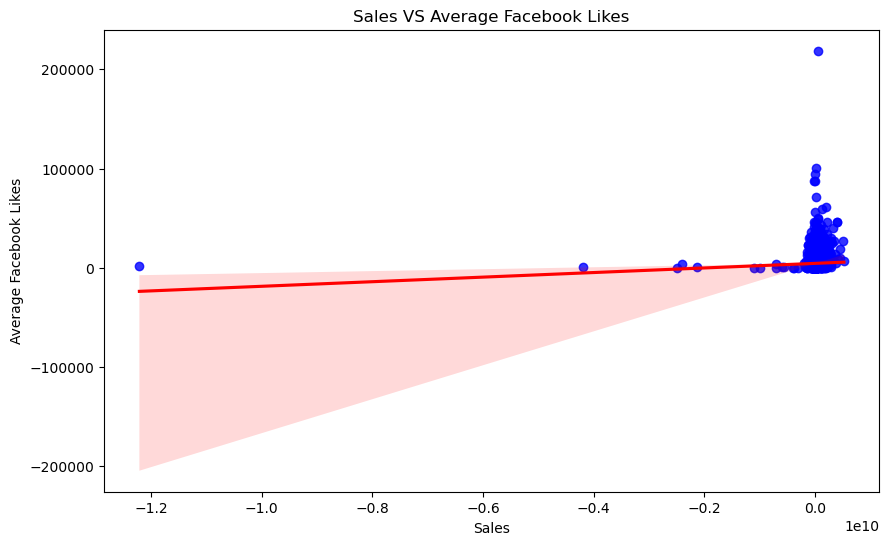

In [23]:
# Calculate the average of Facebook likes
data['average_facebook_likes'] = data[['director_facebook_likes', 
                                       'actor_1_facebook_likes', 
                                       'actor_2_facebook_likes', 
                                       'actor_3_facebook_likes', 
                                       'cast_total_facebook_likes', 
                                       'movie_facebook_likes']].mean(axis=1)

# Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x=data['sales'], 
    y=data['average_facebook_likes'], 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Average Facebook Likes')
plt.title('Sales VS Average Facebook Likes')

# Show plot
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

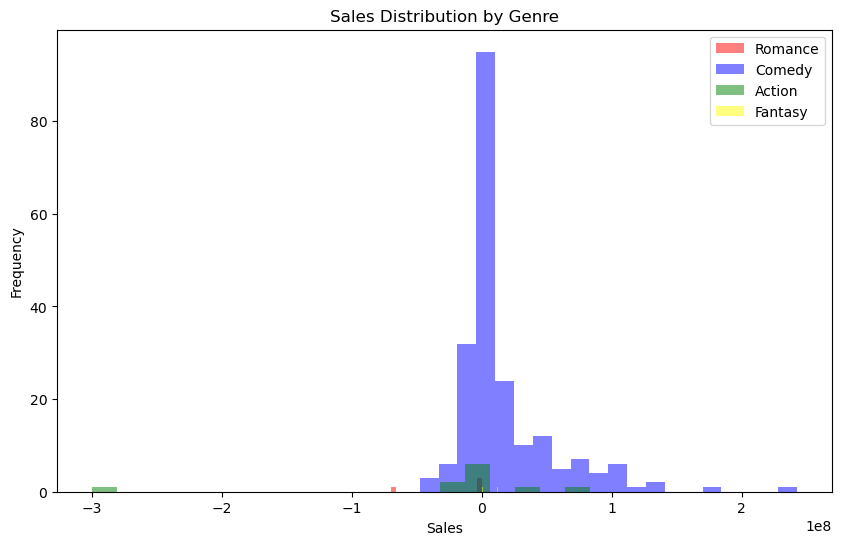

In [32]:
# Filter data by genre
romance_sales = data[data['genres'] == 'Romance']['sales']
comedy_sales = data[data['genres'] == 'Comedy']['sales']
action_sales = data[data['genres'] == 'Action']['sales']
fantasy_sales = data[data['genres'] == 'Fantasy']['sales']

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(romance_sales, bins=20, alpha=0.5, label='Romance', color='red')
plt.hist(comedy_sales, bins=20, alpha=0.5, label='Comedy', color='blue')
plt.hist(action_sales, bins=20, alpha=0.5, label='Action', color='green')
plt.hist(fantasy_sales, bins=20, alpha=0.5, label='Fantasy', color='yellow')

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution by Genre')
plt.legend(loc='upper right')

# Show plot
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [34]:
# Calculates the average likes of the three actors and store it in a new variable3
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Display purposes
print(data['average_actor_likes'])

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64


## Copying the whole dataframe

In [172]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_facebook_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [181]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Apply Min-Max Normalization
normalized_data = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())

# Display the normalized data
normalized_data.head()

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_facebook_likes,average_actor_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
